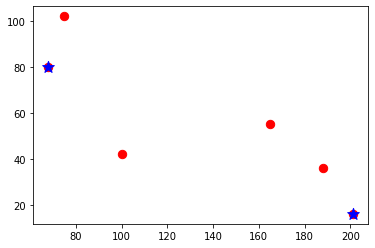

In [1]:
# Solution to KMeans
from copy import deepcopy
import numpy as np # linear algebra
from matplotlib import pyplot as plt

%matplotlib inline

# P1=(75,102), P2=(201,16), P3=(68, 80), P4=(188,36), P5=(165,55) and P6=(100,42)

centers = np.array([[201,16],[68, 80]]) #P2 and P3

# Generate random data and center it to the three centers
data = np.array([[75,102],[201,16],[68,80],[188,36],[165,55],[100,42]]) 

plt.scatter(data[:,0], data[:,1], s=7)

# Number of clusters
k = 2
# Number of training data
n = data.shape[0]
# Number of features in the data
c = data.shape[1]

# Plot the data and the centers generated as random
plt.scatter(data[:,0], data[:,1], c='r', s=70)
plt.scatter(centers[:,0], centers[:,1], marker='*', c='b', s=150)

[[184  35]
 [ 68  80]]
[[184  35]
 [ 81  74]]
[[184  35]
 [ 81  74]]
[[184  35]
 [ 81  74]]

Final Centroids: 
 [[184  35]
 [ 81  74]]


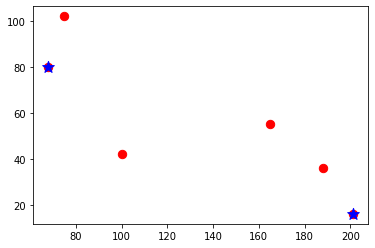

In [2]:
centers_old = np.zeros(centers.shape) # to store old centers
centers_new = deepcopy(centers) # Store new centers

data.shape
clusters = np.zeros(n)
distances = np.zeros((n,k))

error = np.linalg.norm(centers_new - centers_old)

# When, after an update, the estimate of that center stays the same, exit loop
while error != 0:
    # Measure the distance to every center
    for i in range(k):
        distances[:,i] = np.linalg.norm(data - centers[i], axis=1)
    # Assign all training data to closest center
    clusters = np.argmin(distances, axis = 1)
    
    centers_old = deepcopy(centers_new)
    # Calculate mean for every cluster and update the center
    for i in range(k):
        centers_new[i] = np.mean(data[clusters == i], axis=0)
        print(centers_new)  
        
    error = np.linalg.norm(centers_new - centers_old)
print('\nFinal Centroids: \n',centers_new)    

# Plot the data and the centers generated as random
plt.scatter(data[:,0], data[:,1], c='r', s=70)
plt.scatter(centers[:,0], centers[:,1], marker='*', c='b', s=150)

In [3]:
import pandas as pd

def calc_distance(X1, X2):
    return(sum((X1 - X2)**2))**0.5

def findClosestCentroids(ic, X):
    assigned_centroid = []
    for i in X:
        distance=[]
        for j in ic:
            distance.append(calc_distance(i, j))
        assigned_centroid.append(np.argmin(distance))
    return assigned_centroid

get_centroids = findClosestCentroids(centers_new, data)
print('Final clusters: ',get_centroids)

samples = np.array(list(range(len(get_centroids)))) + 1
classes = np.array(get_centroids)
data = np.transpose(np.vstack((samples, classes)))

df = pd.DataFrame(data=list(data), columns=['Samples', 'Classes'])
dfs = df.to_string(index=False)

result = []
for name, group in df.groupby(['Classes']):
    result.append([g['Samples'].values.tolist() for _, g in group.groupby(['Classes'])])

for i, e in enumerate(result):
    print('Cluster ',i+1,tuple(*e))

Final clusters:  [1, 0, 1, 0, 0, 1]
Cluster  0 (2, 4, 5)
Cluster  1 (1, 3, 6)
